In [1]:
%load_ext nb_black

import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings("ignore")
randomseed = 7

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [2]:
test = pd.read_csv("test_set.txt")
train1 = pd.read_csv("training_set_2231_2231_2231.txt")
train2 = pd.read_csv("g_training_set_10000_10000_10000.txt")

<IPython.core.display.Javascript object>

In [3]:
xtrain = train2.iloc[:, 1:-1]
ytrain = train2.iloc[:, -1]
xtest = test.iloc[:, 1:-1]
ytest = test.iloc[:, -1]

<IPython.core.display.Javascript object>

In [4]:
train1.head()

,Unnamed: 0,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,CLASS
0,46,5.90,192.0,25.2,60.0,4.8,1.0,3.0,2.0,0.0,1.0,46.0,2
1,121,10.30,179.0,26.1,39.0,3.5,1.0,3.0,2.0,0.0,0.0,46.0,2
2,123,11.26,191.0,25.5,31.0,2.7,3.0,2.0,2.0,0.0,0.0,48.0,2
3,236,6.90,143.0,27.4,50.0,5.6,3.0,0.0,0.0,0.0,0.0,48.0,2
4,372,6.60,137.0,28.5,34.0,6.3,3.0,1.0,0.0,0.0,0.0,46.0,2


<IPython.core.display.Javascript object>

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=500,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features="auto",
)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

<IPython.core.display.Javascript object>

0.6977401129943502


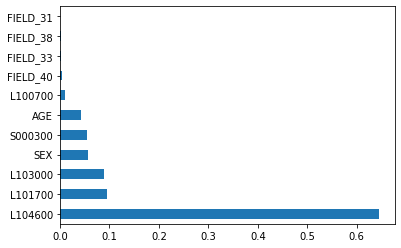

Index(['L104600', 'L101700', 'L103000', 'SEX', 'S000300', 'AGE', 'L100700',
       'FIELD_40', 'FIELD_33', 'FIELD_38', 'FIELD_31'],
      dtype='object')


<IPython.core.display.Javascript object>

In [6]:
ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=xtest.columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [7]:
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.733
Accuracy on test set: 0.698


,0,1,2
0,152,83,1
1,58,159,19
2,0,53,183


<IPython.core.display.Javascript object>

In [8]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       236
           1       0.54      0.67      0.60       236
           2       0.90      0.78      0.83       236

    accuracy                           0.70       708
   macro avg       0.72      0.70      0.70       708
weighted avg       0.72      0.70      0.70       708



<IPython.core.display.Javascript object>

In [9]:
import xgboost as xgb
from sklearn import metrics as m

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

xgb_model.fit(xtrain, ytrain)

y_pred = xgb_model.predict((xtest))

print("accuracy \t", m.accuracy_score(ytest, y_pred))
confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
confmatrx.head()

accuracy 	 0.6765536723163842


,0,1,2
0,152,83,1
1,67,150,19
2,0,59,177


<IPython.core.display.Javascript object>

In [10]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67       236
           1       0.51      0.64      0.57       236
           2       0.90      0.75      0.82       236

    accuracy                           0.68       708
   macro avg       0.70      0.68      0.68       708
weighted avg       0.70      0.68      0.68       708



<IPython.core.display.Javascript object>

In [11]:
# # =====================================
# pred5 = rf.predict((data5.iloc[:, 3:-2]))

# # temp=data5.iloc[:,3:-2]
# # temp.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
# # pred5= xgb_model.predict((temp))

# print(m.accuracy_score(data5.iloc[:, -1], pred5))

# confmatrx = pd.DataFrame(m.confusion_matrix(data5.iloc[:, -1], pred5))
# confmatrx

<IPython.core.display.Javascript object>

In [12]:
# print(classification_report(data5.iloc[:, -1], pred5))

<IPython.core.display.Javascript object>

In [13]:
# ========================================================

<IPython.core.display.Javascript object>